#Přehled požadovaných znalostí a dovedností

• znalost přípravy dat a datasetů: nahrazení chybějících atributů, práce s kategorickými daty, normalizace/standardizace dat, redukce dimenzionality – PCA, LDA

• znalost metody a metrik pro hodnocení klasifikace a regrese včetně jejich použití: accuracy, senzitivita, specificita, F1-skóre, matice záměn, MSE, MAE apod.

• přehled klasických algoritmů pro klasifikaci a regresi v knihovně scikit-learn včetně jejich
použití, znalost jejich základního principu a vlivu některých jejich hyperparametrů (např.pro regularizaci, jádrovou transformaci): rozhodovací a regresní stromy a lesy, metoda SVM a její klony (SVC, SVM, linear SVM), logistická regrese

• schopnost používat pokročilé nástroje knihovny scikit-learn: train-test split, pipes, vícenásobná validace, hledání hyperparametrů

• znalost základních modelů neuronových sítí: model MLP, konvoluční neuronové sítě, včetně výběru aktivačních funkcí; schopnost implementace těchto modelů za použití vysokoúrovňových frameworků např. Keras, PyTorch



DATA: https://archive.ics.uci.edu/dataset/9/auto+mpg

ZADÁNÍ: https://physics.ujep.cz/~jskvor/SZZ/BcAPI/SZZVP/SZZVP-DB.pdf

OPORY: https://drive.google.com/drive/folders/1f0D0NqCkrUqNKdc9jZDM1FpeRWiIOlF-

Ukázková úloha
Uvažujte dataset https://archive.ics.uci.edu/dataset/9/auto+mpg

1. Data vyčistěte a proveďte jejich analýzu (jednoduchá popisná statistika).

  • Diskutujte případnou úpravu dat – nahrazení chybějících a odlehlých hodnot atd.
  
  • Proveďte analýzu důležitosti příznaků např. pomocí metody PCA, nebo pomocí random forests, případně pomocí techniky permutation feature importance, vše je implementováno v knihovně scikit-learn.

2. Z klasických metod strojového učení (lineární regrese, SVR, random forests apod.) vyberte vhodný regresní model pro regresi veličiny MPG (spotřeba – miles per gallon). Pro každý z modelů nalezněte vhodné hyperparametry modelu.

3. Navrhněte jednoduchý (!) regresní model typu MLP, taktéž optimalizujte jeho
hyperparametry (vrstvy, aktivační funkce apod.)

4. Porovnejte vytvořené modely a prezentujte přehlednou formou dosažené výsledky

In [16]:
#Načtení dat - přidání sloupců
import pandas as pd

columns = ["mpg", "cylinders", "displacement", "horsepower",
           "weight", "acceleration", "model_year", "origin", "car_name"]

df = pd.read_csv("./auto-mpg.data-original",
                 delim_whitespace=True,  # oddělené mezerami
                 header=None,            # řádek 0 není hlavička
                 names=columns)          # vlastní názvy
print(df.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0        8.0         307.0       130.0  3504.0          12.0   
1  15.0        8.0         350.0       165.0  3693.0          11.5   
2  18.0        8.0         318.0       150.0  3436.0          11.0   
3  16.0        8.0         304.0       150.0  3433.0          12.0   
4  17.0        8.0         302.0       140.0  3449.0          10.5   

   model_year  origin                   car_name  
0        70.0     1.0  chevrolet chevelle malibu  
1        70.0     1.0          buick skylark 320  
2        70.0     1.0         plymouth satellite  
3        70.0     1.0              amc rebel sst  
4        70.0     1.0                ford torino  


C:\Users\Marty\AppData\Local\Temp\ipykernel_157588\291698291.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("./auto-mpg.data-original",


In [17]:
# Základní popisné statistiky
print(df.describe())

#Odledhlé hodnoty... - já je nevidím

              mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  406.000000    406.000000  400.000000   406.000000   
mean    23.514573    5.475369    194.779557  105.082500  2979.413793   
std      7.815984    1.712160    104.922458   38.768779   847.004328   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    105.000000   75.750000  2226.500000   
50%     23.000000    4.000000    151.000000   95.000000  2822.500000   
75%     29.000000    8.000000    302.000000  130.000000  3618.250000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model_year      origin  
count    406.000000  406.000000  406.000000  
mean      15.519704   75.921182    1.568966  
std        2.803359    3.748737    0.797479  
min        8.000000   70.000000    1.000000  
25%       13.700000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.175000   79.0000

In [18]:
#Kontrola integrity datasetu - NaN
for c in df.columns.to_list():
  print(f"{c}: {df[c].isna().sum()}")

#Kontrola integrity datasetu - null
for c in df.columns.to_list():
  print(f"{c}: {df[c].isnull().sum()}")


#NaN
#chybějící data mpg
print(df[df['mpg'].isna()])

#chybějící data mpg
print(df[df['horsepower'].isna()])

#počet záznamů
print(f"Počet záznamů: {len(df)}")

#kontrola záznamů, kde je hp a mpg nan
print(f"řádky kde jsou NA oba sloupce:\n{df[df['horsepower'].isna() & df['mpg'].isna()]}") #neexistuje průnik


mpg: 8
cylinders: 0
displacement: 0
horsepower: 6
weight: 0
acceleration: 0
model_year: 0
origin: 0
car_name: 0
mpg: 8
cylinders: 0
displacement: 0
horsepower: 6
weight: 0
acceleration: 0
model_year: 0
origin: 0
car_name: 0
     mpg  cylinders  displacement  horsepower  weight  acceleration  \
10   NaN        4.0         133.0       115.0  3090.0          17.5   
11   NaN        8.0         350.0       165.0  4142.0          11.5   
12   NaN        8.0         351.0       153.0  4034.0          11.0   
13   NaN        8.0         383.0       175.0  4166.0          10.5   
14   NaN        8.0         360.0       175.0  3850.0          11.0   
17   NaN        8.0         302.0       140.0  3353.0           8.0   
39   NaN        4.0          97.0        48.0  1978.0          20.0   
367  NaN        4.0         121.0       110.0  2800.0          15.4   

     model_year  origin                          car_name  
10         70.0     2.0              citroen ds-21 pallas  
11         70.0 

In [19]:
#pip install scikit-learn

In [20]:
# MUSÍM IMPORTOVAT EXPERIMENTAL - jinak to nejde
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer

import numpy as np

s_imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
df['mpg'] = s_imputer.fit_transform(df[['mpg']])
df['horsepower'] = s_imputer.fit_transform(df[['horsepower']])


for c in df.columns.to_list():
  print(f"{c}: {df[c].isna().sum()}")

mpg: 0
cylinders: 0
displacement: 0
horsepower: 0
weight: 0
acceleration: 0
model_year: 0
origin: 0
car_name: 0


In [21]:
#Nebo pandas - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html
#data['velikost'].fillna(method='bfill', inplace=True)
#data['triko'].fillna(method='ffill', inplace=True)
#data['nebezpeci'].interpolate(method='linear', inplace=True)

In [22]:
# Encode kategorické proměnné
#nepoužiju hot encoder - řídká matice, použiju ordinální kodovani
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
df['car_name'] = enc.fit_transform(df['car_name'].values.reshape(-1, 1))
print(df.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0        8.0         307.0       130.0  3504.0          12.0   
1  15.0        8.0         350.0       165.0  3693.0          11.5   
2  18.0        8.0         318.0       150.0  3436.0          11.0   
3  16.0        8.0         304.0       150.0  3433.0          12.0   
4  17.0        8.0         302.0       140.0  3449.0          10.5   

   model_year  origin  car_name  
0        70.0     1.0      50.0  
1        70.0     1.0      37.0  
2        70.0     1.0     235.0  
3        70.0     1.0      14.0  
4        70.0     1.0     164.0  


##Redukce dimenzionality
- nejjednodušší: míra variablity rozptylu - VarianceTreshold
- Analza hlavních komponent - PCA

[0.67105289 0.11623742 0.10079841 0.06017444]
Celkem % variablity: [0.67105289 0.78729032 0.88808872 0.94826316]
----------
Jednotlivé komponenty: [[-0.38025048  0.40294971  0.41695489  0.40093958  0.40179776 -0.26912427
  -0.21704724 -0.27831342]
 [ 0.04660892  0.12299033  0.11656419 -0.11454792  0.2096668   0.43166655
   0.6762269  -0.51808644]
 [-0.31336283 -0.08224457 -0.0824329  -0.23329078 -0.01111374  0.61835252
  -0.60453721 -0.29303788]
 [-0.13130247  0.20397718  0.13121143  0.11381595  0.32774999  0.49309406
   0.11853711  0.73916819]]
                   PC1       PC2       PC3       PC4
mpg          -0.380250  0.046609 -0.313363 -0.131302
cylinders     0.402950  0.122990 -0.082245  0.203977
displacement  0.416955  0.116564 -0.082433  0.131211
horsepower    0.400940 -0.114548 -0.233291  0.113816
weight        0.401798  0.209667 -0.011114  0.327750
acceleration -0.269124  0.431667  0.618353  0.493094
model_year   -0.217047  0.676227 -0.604537  0.118537
origin       -0.278313 -

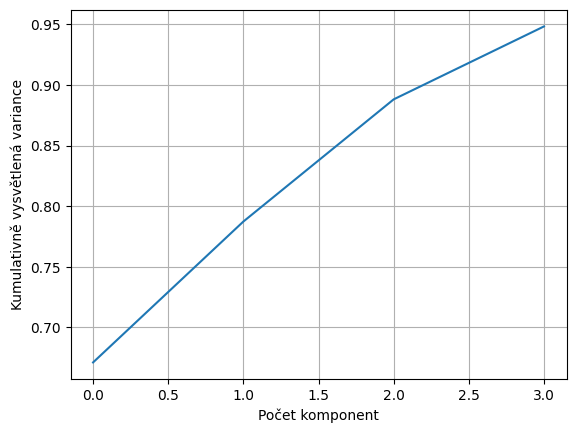

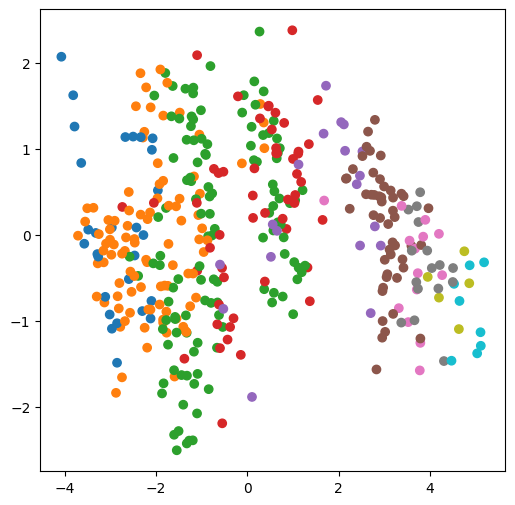

In [23]:
#PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

df_bez_jmena = df.drop(columns=['car_name'])

# centruj a naškáluj=standardizace
X =(df_bez_jmena-np.mean(df_bez_jmena))/df_bez_jmena.std()

pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)

#print("Komponenty:", pca.components_)
print(pca.explained_variance_ratio_)
print("Celkem % variablity:", np.cumsum(pca.explained_variance_ratio_))

print(10*"-")
print("Jednotlivé komponenty:", pca.components_)

loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(pca.n_components)],
    index=df_bez_jmena.columns
)
print(loadings)
print(10*"-")


#elbow method
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Počet komponent")
plt.ylabel("Kumulativně vysvětlená variance")
plt.grid(True)
plt.show()

# Zvolil bych 4 komponenty

plt.rcParams['figure.figsize'] = [6, 6]
plt.scatter(X_pca[:,0], X_pca[:,1], c=df['horsepower'], cmap='tab10')

#print(X_pca)

#LDA - lineární diskriminační analýza


c:\Users\Marty\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  ys_types = set(type_of_target(x) for x in ys)


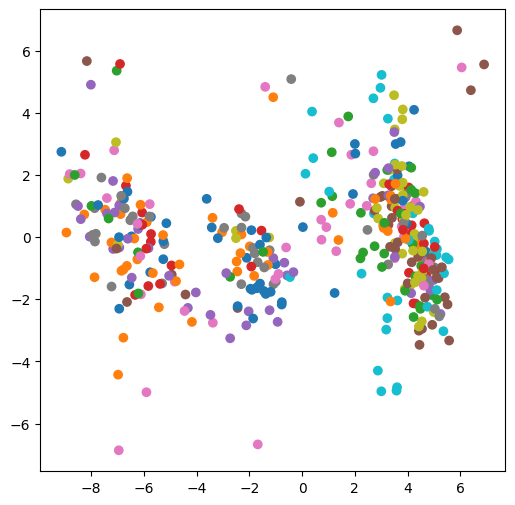

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=3)
y = df['car_name']
X_lda = lda.fit_transform(X, y)

plt.scatter(X_lda[:,0], X_lda[:,1], c=y, cmap='tab10')

Výstupem - data nejsou separabilní ani jednou lineární metodou - co se týče analýzou lavních komponent, tak první čtyři vysvětlují 0.94826316 variability dat.

##OLS (Ordinary Least Squares) - regresní analýza
https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html

In [25]:
#regresní analýza - OLS
import statsmodels.api as sm

y = df['car_name']
X = df.drop(columns='car_name')
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

ModuleNotFoundError: No module named 'statsmodels'

**R2** je naprosto minimální - cca 15%

**origin** - p-hodnota: 0.000 - ten má nejvýznamější
**weight** - p-hodnota: 0.048 - ten je tesně pod alfou

##Selekce regresorů - feature_importances

Jako druhou metodu jsem si zvolil dělení příznakového prostoru při konstrukci stromu

**feature_importances_** - poskytuje informace o relativní důležitosti každého vstupního atributu (feature) použitého pro trénování modelu. Tento ukazatel důležitosti je užitečný pro pochopení, které atributy mají největší vliv na předpovědní schopnost modelu.

Následně metoda **feature_importances_** vypočítá průměrou normalnizovanou účinnost snížení nečistoty (impurity), která každá vlastnost dosáhnne ve všech stromech v lese. Pak ten průměr každého atributu normalizován do intervalu <0,1>.

        Feature  Importance
8        origin    0.208116
3  displacement    0.155649
5        weight    0.144088
4    horsepower    0.137435
6  acceleration    0.133813
1           mpg    0.129902
7    model_year    0.081098
2     cylinders    0.009899
0         const    0.000000


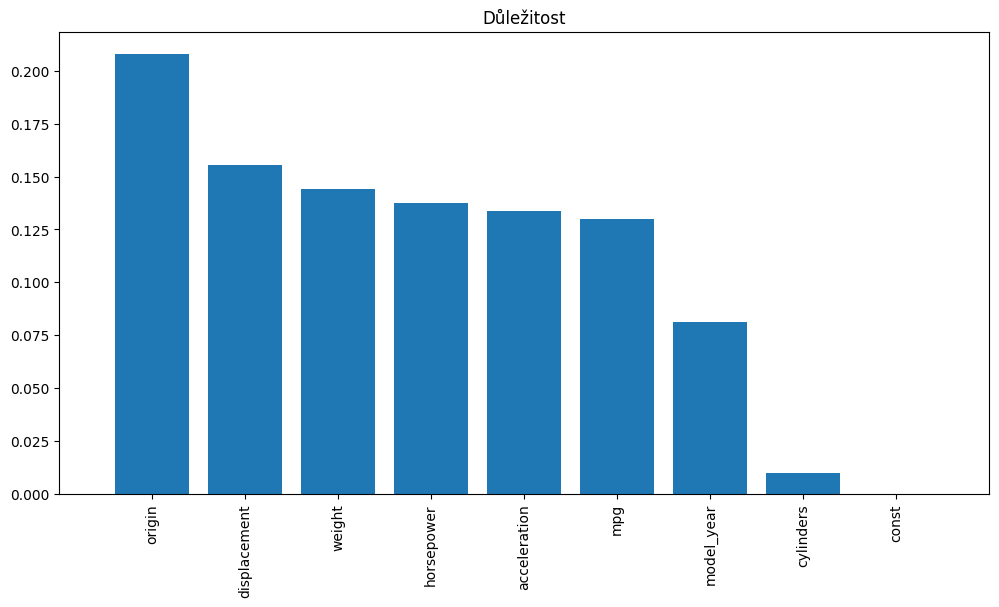

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

forest = RandomForestRegressor(random_state=0)
forest.fit(X_train, y_train)

importances = forest.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

plt.figure(figsize=(12, 6))
plt.title("Důležitost")
plt.bar(range(X.shape[1]), feature_importance_df['Importance'], align="center")
plt.xticks(range(X.shape[1]), feature_importance_df['Feature'], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

Tento model je založen na rozhodovacích stromech. Random Forest zachytí složité nelineární vztahy a interakce mezi proměnnými, které lineární model nemusí být schopen identifikovat - proto se nám regresory liší u jednotlivých metod.

##Regrese sloupce MPG

In [ ]:
#Lineární regrese
import numpy as np
from sklearn.linear_model import LinearRegression
import time

data = df.copy()
X = data.drop(columns=["mpg"])
y = data["mpg"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lreg = LinearRegression()

start_time = time.time()
lreg.fit(X_train, y_train)
end_time = time.time()

hat_lreg = lreg.predict(X_test)

lin_reg_time = end_time - start_time


print(f"intercept: {lreg.intercept_}; koeficienty: {lreg.coef_}")

MSE_lreg = ((y_test - hat_lreg)**2).mean()
print(f"MSE test Lin. reg. by sklearn: {MSE_lreg}")

R2_lreg = lreg.score(X,y)
print(f"R squared Lin. reg. by sklearn: {R2_lreg}")

print(f"Čas učení modelu: {lin_reg_time} sekund")

intercept: -7.681485023417274; koeficienty: [-0.57484391  0.02486354 -0.03428388 -0.00633714 -0.11582706  0.67244736
  1.54551563  0.00221362]
MSE test Lin. reg. by sklearn: 13.394131386481526
R squared Lin. reg. by sklearn: 0.7942850630600816
Čas učení modelu: 0.002207040786743164 sekund


In [ ]:
#SVR
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

data = df.copy()
X = data.drop(columns=["mpg"])
y = data["mpg"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))

start_time = time.time()
regr.fit(X_train, y_train)
end_time = time.time()

svr_time = end_time - start_time

hat_test = regr.predict(X_test)

MSE_svr = ((y_test - hat_test)**2).mean()
print(f"MSE test SVR: {MSE_svr}")

R2_svr = regr.score(X,y)
print(f"R squared SVR: {R2_svr}")

print(f"Čas učení modelu: {svr_time} sekund")

MSE test SVR: 13.97813680921903
R squared SVR: 0.8195282910365287
Čas učení modelu: 0.006632566452026367 sekund


In [ ]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

data = df.copy()
X = data.drop(columns=["mpg"])
y = data["mpg"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rfr = RandomForestRegressor() #n_estimators - 100 default

start_time = time.time()
rfr.fit(X_train, y_train)
end_time = time.time()

rfr_time = end_time - start_time

hat_test = rfr.predict(X_test)

MSE_rfr = ((y_test - hat_test)**2).mean()
print(f"MSE test RFR: {MSE_rfr}")

R2_rfr = rfr.score(X,y)
print(f"R squared: {R2_rfr}")

print(f"Čas učení modelu: {rfr_time} sekund")

MSE test RFR: 8.978461512626554
R squared: 0.9547176434868271
Čas učení modelu: 0.2569255828857422 sekund


In [ ]:
import pandas as pd

d = {
    "Metric": ["MSE", "R2", "Time"],
    "Linear Regression - sklearn": [MSE_lreg, R2_lreg, lin_reg_time],
    "SVR": [MSE_svr, R2_svr, svr_time],
    "Random Forest Regressor": [MSE_rfr, R2_rfr, rfr_time]
}

comparison = pd.DataFrame(d)
comparison.set_index("Metric", inplace=True)
comparison = comparison.transpose()

print(comparison)

Metric                             MSE        R2      Time
Linear Regression - sklearn  13.394131  0.794285  0.002207
SVR                          13.978137  0.819528  0.006633
Random Forest Regressor       9.303457  0.952662  0.163130


MSE - Mean Squared Error - nejmenší má RFR
R2 - největší % variability vysvětluje RFR - cca 95%
Time - nejrychlejší je LR, s malým časovým rozdílem pak SVR - RFR dopadlo nejhůře

Nejpřesnější model je RFR, pomocí hypertuningu parametrů zkusím získat lepší čas.

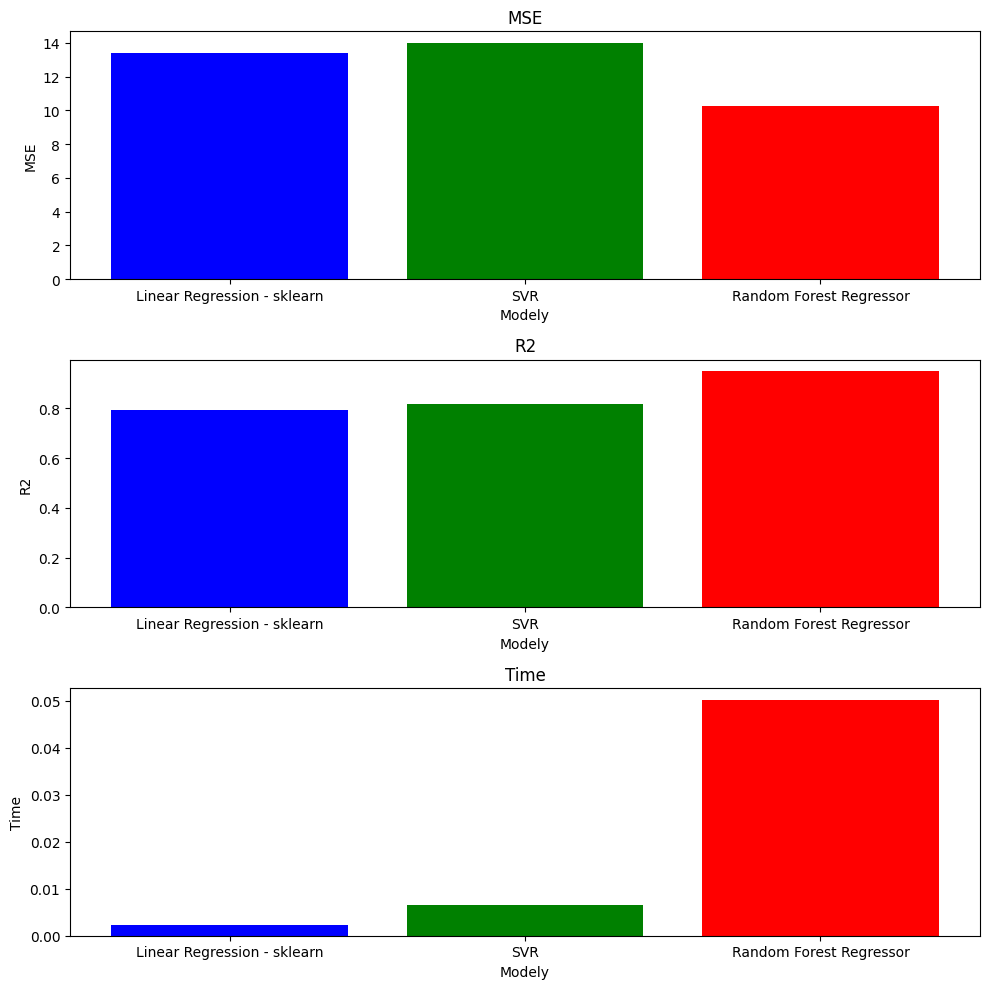

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

values = {}
model_names = ["Linear Regression - sklearn", "SVR", "Random Forest Regressor"]
metrics = ["MSE", "R2", "Time"]

for i, model in enumerate(model_names):
    values[model] = comparison.iloc[i].tolist()

fig, axes = plt.subplots(3, 1, figsize=(10, 10))  # tři subploty na jednom obrázku

for i, metric in enumerate(metrics):
    ax = axes[i]
    metric_values = [values[model][i] for model in model_names]
    ax.bar(model_names, metric_values, color=['blue', 'green', 'red'])
    ax.set_title(f'{metric}')
    ax.set_xlabel('Modely')
    ax.set_ylabel(f'{metric}')

plt.tight_layout()
plt.show()

##Hyperparametr tuning

In [ ]:
# RFR
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

data = df.copy()
X = data.drop(columns=["mpg"])
y = data["mpg"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

h_rfr = RandomForestRegressor(max_depth=6, n_estimators=40)
# max_depth - maximální hloubka stromu, n_estimators - počet stromů v lese

start_time = time.time()
h_rfr.fit(X_train, y_train)
end_time = time.time()

h_rfr_time = end_time - start_time

hat_test = rfr.predict(X_test)

MSE_h_rfr = ((y_test - hat_test)**2).mean()
print(f"MSE test RFR: {MSE_h_rfr}")

R2_h_rfr = h_rfr.score(X,y)
print(f"R squared: {R2_h_rfr}")

print(f"Čas učení modelu: {h_rfr_time} sekund")

MSE test RFR: 8.978461512626554
R squared: 0.9369293145558117
Čas učení modelu: 0.06726670265197754 sekund


In [ ]:
#Porovnání tuned a default RFR

porovnani = {
    "Metric": ["MSE", "R2", "Time"],
    "Random Forest Regressor": [MSE_rfr, R2_rfr, rfr_time],
    "TUNED - Random Forest Regressor": [MSE_h_rfr, R2_h_rfr, h_rfr_time]
}

comparison = pd.DataFrame(porovnani)
comparison.set_index("Metric", inplace=True)
comparison = comparison.transpose()

print(comparison)

Metric                                MSE        R2      Time
Random Forest Regressor          8.978462  0.954718  0.256926
TUNED - Random Forest Regressor  8.978462  0.936929  0.067267


**MSE** zůstalo stejné, R2 lehce kleslo, čas klesla na cca 0.24 časové náročnosti před tuningem parametru.

Pro snížení časové náročnosti jsem omezel počet stromů v lese za 100 na 40. Také jsem omezil hloubku stromů na 6.

##GridSearchSV

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import time

data = df.copy()
X = data.drop(columns=["mpg"])
y = data["mpg"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- mřížka hyperparametrů ---
param_grid = {
    "n_estimators": [40, 100, 200],
    "max_depth": [None, 6, 10, 16],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2", 0.8]
}

base = RandomForestRegressor(random_state=42, n_jobs=-1)

# hodnotíme podle MSE (negativní, protože scikit maximalizuje score) + křížová validace
gcv = GridSearchCV(
    estimator=base,
    param_grid=param_grid,
    scoring="neg_mean_squared_error",
    cv=5,
    n_jobs=-1,
    verbose=0,
    return_train_score=False
)

t0 = time.time()
gcv.fit(X_train, y_train)
train_time = time.time() - t0

print("Nejlepší parametry:", gcv.best_params_)
print("CV MSE (↓):", -gcv.best_score_)
print(f"Čas hledání: {train_time:.2f} s")

# test na stranou odložených datech
best_model = gcv.best_estimator_
y_pred = best_model.predict(X_test)
print("Test MSE (↓):", mean_squared_error(y_test, y_pred))
print("Test R² (↑):", r2_score(y_test, y_pred))

Nejlepší parametry: {'max_depth': None, 'max_features': 0.8, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
CV MSE (↓): 8.832122387427898
Čas hledání: 223.77 s
Test MSE (↓): 9.018158641892278
Test R² (↑): 0.8546700836384375


In [ ]:
# RFR
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

data = df.copy()
X = data.drop(columns=["mpg"])
y = data["mpg"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

h2_rfr = RandomForestRegressor(max_depth= None, max_features= 0.8, min_samples_leaf= 1, min_samples_split= 5, n_estimators= 100)
# max_depth - maximální hloubka stromu, n_estimators - počet stromů v lese

start_time = time.time()
h2_rfr.fit(X_train, y_train)
end_time = time.time()

h2_rfr_time = end_time - start_time

hat_test = h2_rfr.predict(X_test)

MSE_h2_rfr = ((y_test - hat_test)**2).mean()
print(f"MSE test RFR: {MSE_h2_rfr}")

R2_h2_rfr = h_rfr.score(X,y)
print(f"R squared: {R2_h2_rfr}")

print(f"Čas učení modelu: {h2_rfr_time} sekund")

MSE test RFR: 9.479804222283049
R squared: 0.9369293145558117
Čas učení modelu: 0.14011144638061523 sekund


##MLP - Multi Layer Perceptron



In [ ]:
!pip install tensorflow

In [ ]:
# ZKUSIT STANDARTIZACI A ŠKÁLOVÁNÍ..
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras import models, layers
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# --- data ---
data = df.copy()
X = data.drop(columns=["mpg","car_name"])
print(X.head())
y = data["mpg"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- model ---
def get_model():
    #doladit
    model = models.Sequential()
    model.add(layers.Dense(units = 32, activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(loss='mse', optimizer='rmsprop', metrics=['mse','mae'])
    return model

EPOCHS = 50
model = get_model()
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=32,
                    validation_split=0.1, verbose=0)


   cylinders  displacement  horsepower  weight  acceleration  model_year  \
0        8.0         307.0       130.0  3504.0          12.0        70.0   
1        8.0         350.0       165.0  3693.0          11.5        70.0   
2        8.0         318.0       150.0  3436.0          11.0        70.0   
3        8.0         304.0       150.0  3433.0          12.0        70.0   
4        8.0         302.0       140.0  3449.0          10.5        70.0   

   origin  
0     1.0  
1     1.0  
2     1.0  
3     1.0  
4     1.0  


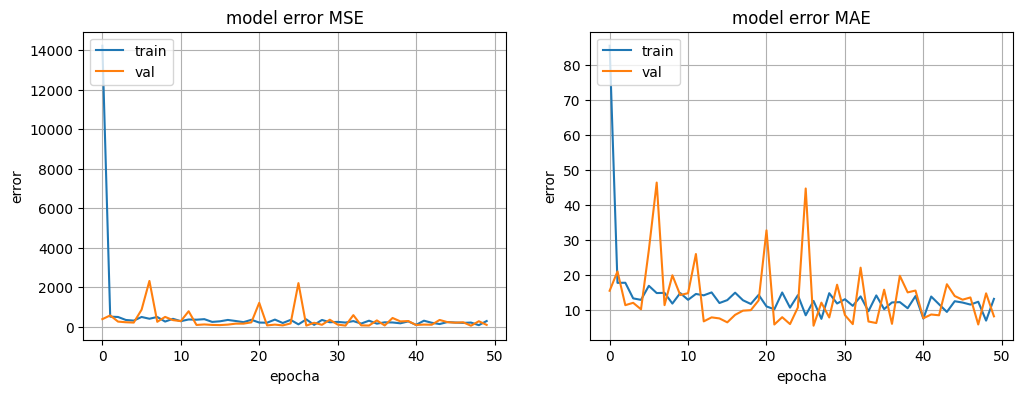

In [ ]:
plt.rcParams["figure.figsize"] = [12,4]
figure, axis = plt.subplots(1, 2)
axis[0].plot(history.history['mse'])
axis[0].plot(history.history['val_mse'])
axis[0].set_title('model error MSE')
axis[0].set_ylabel('error')
axis[0].set_xlabel('epocha')
axis[0].legend(['train', 'val'], loc='upper left')
axis[0].grid()


axis[1].plot(history.history['mae'])
axis[1].plot(history.history['val_mae'])
axis[1].set_title('model error MAE')
axis[1].set_ylabel('error')
axis[1].set_xlabel('epocha')
axis[1].legend(['train', 'val'], loc='upper left')
axis[1].grid()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_hat = model.predict(X_test)

MSE_test = mean_squared_error(y_hat,y_test)
MAE_test = mean_absolute_error(y_hat,y_test)
print(f"Chyba v MSE na testovacich datech {MSE_test}")
print(f"Chyba v MAE na testovacich datech {MAE_test}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Chyba v MSE na testovacich datech 119.2519097895608
Chyba v MAE na testovacich datech 9.059137351852756
